In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns

# Konfiguracja wizualizacji
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print(" LABORATORIUM 3: PERCEPTRON I REGUŁA HEBBA ".center(80))
print("=" * 80)

                   LABORATORIUM 3: PERCEPTRON I REGUŁA HEBBA                    


In [9]:
print("\n📋 ZADANIE 1: Zbiór uczący dla operacji OR\n")

# Zbiór uczący S4 dla operacji OR
S4_OR = np.array([
    [0, 0, 0],  # x1=0, x2=0 → d=0
    [0, 1, 1],  # x1=0, x2=1 → d=1
    [1, 0, 1],  # x1=1, x2=0 → d=1
    [1, 1, 1]   # x1=1, x2=1 → d=1
])

df_or = pd.DataFrame(S4_OR, columns=['x₁', 'x₂', 'd (x₁∨x₂)'])
print("Tabela prawdy dla operacji OR:")
display(df_or)

# Zbiór uczący S4 dla operacji AND (do późniejszych zadań)
S4_AND = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])



📋 ZADANIE 1: Zbiór uczący dla operacji OR

Tabela prawdy dla operacji OR:


,x₁,x₂,d (x₁∨x₂)
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [18]:
print("\n" + "=" * 80)
print(" ZADANIE 2: Implementacja reguł uczenia ".center(80))
print("=" * 80)

class Perceptron:
    """
    Implementacja perceptronu z regułą uczenia perceptronu.

    Parametry:
    ----------
    learning_rate : float
        Współczynnik uczenia η
    max_iterations : int
        Maksymalna liczba iteracji uczenia
    """

    def __init__(self, learning_rate=0.1, max_iterations=1000):
        self.eta = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.history = []

    def activation(self, s):
        """Funkcja progowa"""
        return 1 if s >= 0 else 0

    def predict(self, X):
        """Predykcja dla danych wejściowych"""
        X_bias = np.insert(X, 0, 1)  # Dodanie bias (w0)
        s = np.dot(self.weights, X_bias)
        return self.activation(s)

    def fit(self, X, d):
        """
        Uczenie perceptronu regułą perceptronu.

        Parametry:
        ----------
        X : array-like, shape (n_samples, n_features)
            Dane wejściowe
        d : array-like, shape (n_samples,)
            Oczekiwane wartości wyjściowe
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features + 1)  # w0, w1, w2
        self.history = []

        for iteration in range(self.max_iterations):
            errors = 0

            for i in range(n_samples):
                X_i = np.insert(X[i], 0, 1)  # Dodanie bias
                y = self.predict(X[i])

                # Aktualizacja wag: Δwᵢ = η(d - y)xᵢ
                delta = self.eta * (d[i] - y)
                self.weights += delta * X_i

                if d[i] != y:
                    errors += 1

            self.history.append({
                'iteration': iteration + 1,
                'errors': errors,
                'weights': self.weights.copy()
            })

            # Jeśli wszystkie przykłady sklasyfikowane poprawnie
            if errors == 0:
                return iteration + 1

        return self.max_iterations


class HebbianPerceptron:
    """
    Implementacja perceptronu z regułą Hebba (z forsowaniem).

    Parametry:
    ----------
    learning_rate : float
        Współczynnik uczenia η
    max_iterations : int
        Maksymalna liczba iteracji uczenia
    """

    def __init__(self, learning_rate=0.1, max_iterations=1000):
        self.eta = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.history = []

    def activation(self, s):
        """Funkcja progowa"""
        return 1 if s >= 0 else 0

    def predict(self, X):
        """Predykcja dla danych wejściowych"""
        X_bias = np.insert(X, 0, 1)
        s = np.dot(self.weights, X_bias)
        return self.activation(s)

    def fit(self, X, d):
        """
        Uczenie perceptronu regułą Hebba z forsowaniem.

        Parametry:
        ----------
        X : array-like, shape (n_samples, n_features)
            Dane wejściowe
        d : array-like, shape (n_samples,)
            Oczekiwane wartości wyjściowe
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features + 1)
        self.history = []

        for iteration in range(self.max_iterations):
            errors = 0

            for i in range(n_samples):
                X_i = np.insert(X[i], 0, 1)

                # Reguła Hebba z forsowaniem: Δwᵢ = η·xᵢ·d
                self.weights += self.eta * X_i * d[i]

                # Sprawdzenie poprawności klasyfikacji
                y = self.predict(X[i])
                if d[i] != y:
                    errors += 1

            self.history.append({
                'iteration': iteration + 1,
                'errors': errors,
                'weights': self.weights.copy()
            })

            if errors == 0:
                return iteration + 1

        return self.max_iterations





                     ZADANIE 2: Implementacja reguł uczenia                     


In [20]:
print("\n" + "=" * 80)
print(" ZADANIE 3: Porównanie liczby iteracji ".center(80))
print("=" * 80)

def test_learning(X, d, operation_name, learning_rate=0.1):
    """Testowanie obu metod uczenia"""

    # Reguła perceptronu
    perc = Perceptron(learning_rate=learning_rate)
    iter_perc = perc.fit(X, d)

    # Reguła Hebba
    hebb = HebbianPerceptron(learning_rate=learning_rate)
    iter_hebb = hebb.fit(X, d)

    print(f"\n Test dla operacji {operation_name} (η={learning_rate}):")
    print(f"   • Reguła Perceptronu: {iter_perc} iteracji")
    print(f"   • Reguła Hebba:       {iter_hebb} iteracji")

    return perc, hebb, iter_perc, iter_hebb

# Test dla OR
X_or = S4_OR[:, :2]
d_or = S4_OR[:, 2]

perc_or, hebb_or, iter_perc_or, iter_hebb_or = test_learning(
    X_or, d_or, "OR", learning_rate=0.1
)

# Wyświetlenie końcowych wag
print(f"\n Końcowe wagi dla operacji OR:")
print(f"   Perceptron: w₀={perc_or.weights[0]:.3f}, w₁={perc_or.weights[1]:.3f}, w₂={perc_or.weights[2]:.3f}")
print(f"   Hebb:       w₀={hebb_or.weights[0]:.3f}, w₁={hebb_or.weights[1]:.3f}, w₂={hebb_or.weights[2]:.3f}")



                     ZADANIE 3: Porównanie liczby iteracji                      

 Test dla operacji OR (η=0.1):
   • Reguła Perceptronu: 4 iteracji
   • Reguła Hebba:       1000 iteracji

 Końcowe wagi dla operacji OR:
   Perceptron: w₀=-0.100, w₁=0.100, w₂=0.100
   Hebb:       w₀=300.000, w₁=200.000, w₂=200.000



                         ZADANIE 4: Efektywność uczenia                         

 4a) Szybkość osiągnięcia poprawnego działania:

   η=0.01 → Perceptron:   4 iter, Hebb: 1000 iter
   η=0.05 → Perceptron:   4 iter, Hebb: 1000 iter
   η=0.10 → Perceptron:   4 iter, Hebb: 1000 iter
   η=0.30 → Perceptron:   4 iter, Hebb: 1000 iter
   η=0.50 → Perceptron:   4 iter, Hebb: 1000 iter
   η=1.00 → Perceptron:   4 iter, Hebb: 1000 iter


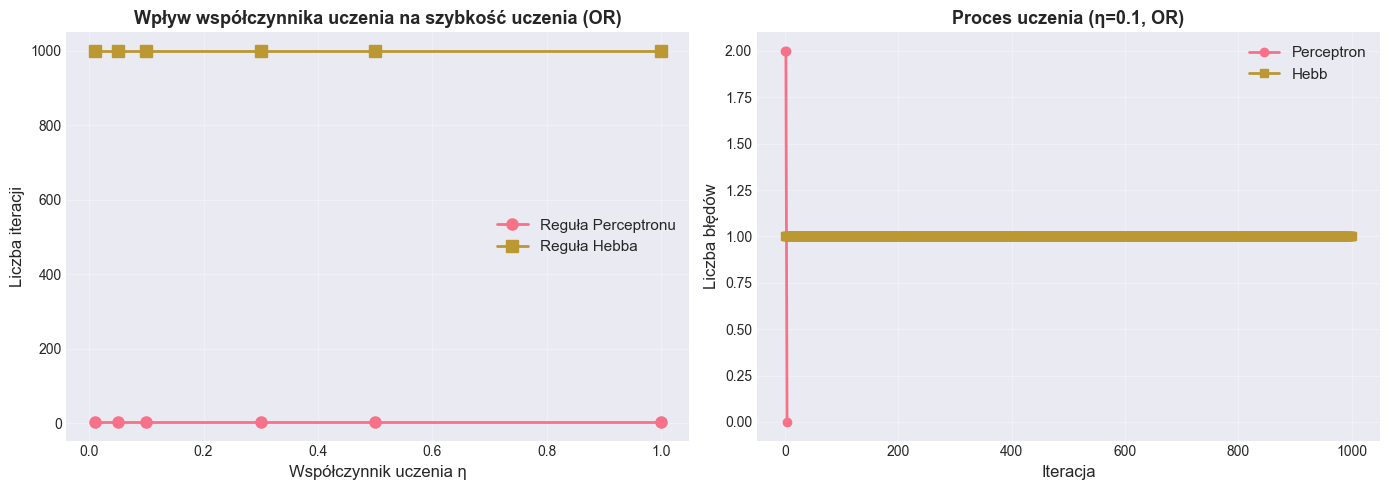

In [21]:
print("\n" + "=" * 80)
print(" ZADANIE 4: Efektywność uczenia ".center(80))
print("=" * 80)

# 4a: Szybkość osiągnięcia poprawnego działania
print("\n 4a) Szybkość osiągnięcia poprawnego działania:\n")

learning_rates = [0.01, 0.05, 0.1, 0.3, 0.5, 1.0]
results_perc = []
results_hebb = []

for lr in learning_rates:
    perc = Perceptron(learning_rate=lr)
    iter_p = perc.fit(X_or, d_or)

    hebb = HebbianPerceptron(learning_rate=lr)
    iter_h = hebb.fit(X_or, d_or)

    results_perc.append(iter_p)
    results_hebb.append(iter_h)

    print(f"   η={lr:4.2f} → Perceptron: {iter_p:3d} iter, Hebb: {iter_h:3d} iter")

# Wizualizacja
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Wykres 1: Porównanie liczby iteracji
ax1.plot(learning_rates, results_perc, 'o-', label='Reguła Perceptronu', linewidth=2, markersize=8)
ax1.plot(learning_rates, results_hebb, 's-', label='Reguła Hebba', linewidth=2, markersize=8)
ax1.set_xlabel('Współczynnik uczenia η', fontsize=12)
ax1.set_ylabel('Liczba iteracji', fontsize=12)
ax1.set_title('Wpływ współczynnika uczenia na szybkość uczenia (OR)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Wykres 2: Historia uczenia dla η=0.1
perc_demo = Perceptron(learning_rate=0.1)
perc_demo.fit(X_or, d_or)
hebb_demo = HebbianPerceptron(learning_rate=0.1)
hebb_demo.fit(X_or, d_or)

perc_errors = [h['errors'] for h in perc_demo.history]
hebb_errors = [h['errors'] for h in hebb_demo.history]

ax2.plot(range(1, len(perc_errors)+1), perc_errors, 'o-', label='Perceptron', linewidth=2, markersize=6)
ax2.plot(range(1, len(hebb_errors)+1), hebb_errors, 's-', label='Hebb', linewidth=2, markersize=6)
ax2.set_xlabel('Iteracja', fontsize=12)
ax2.set_ylabel('Liczba błędów', fontsize=12)
ax2.set_title('Proces uczenia (η=0.1, OR)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [23]:
print("\n" + "=" * 80)
print(" ZADANIE 5: Porównanie operacji OR i AND ".center(80))
print("=" * 80)

X_and = S4_AND[:, :2]
d_and = S4_AND[:, 2]

print("\n Porównanie szybkości uczenia dla OR vs AND:\n")

comparison_results = []

for lr in [0.1, 0.5, 1.0]:
    # OR
    perc_or = Perceptron(learning_rate=lr)
    iter_or_p = perc_or.fit(X_or, d_or)
    hebb_or = HebbianPerceptron(learning_rate=lr)
    iter_or_h = hebb_or.fit(X_or, d_or)

    # AND
    perc_and = Perceptron(learning_rate=lr)
    iter_and_p = perc_and.fit(X_and, d_and)
    hebb_and = HebbianPerceptron(learning_rate=lr)
    iter_and_h = hebb_and.fit(X_and, d_and)

    print(f"η={lr:.1f}:")
    print(f"   OR:  Perceptron={iter_or_p:2d} iter, Hebb={iter_or_h:2d} iter")
    print(f"   AND: Perceptron={iter_and_p:2d} iter, Hebb={iter_and_h:2d} iter")
    print()

    comparison_results.append({
        'lr': lr,
        'OR_Perc': iter_or_p,
        'OR_Hebb': iter_or_h,
        'AND_Perc': iter_and_p,
        'AND_Hebb': iter_and_h
    })

print("   Wniosek: Operacje OR i AND wymagają podobnej liczby iteracji.")
print("   Obie operacje są liniowo separowalne.")



                    ZADANIE 5: Porównanie operacji OR i AND                     

 Porównanie szybkości uczenia dla OR vs AND:

η=0.1:
   OR:  Perceptron= 4 iter, Hebb=1000 iter
   AND: Perceptron= 4 iter, Hebb=1000 iter

η=0.5:
   OR:  Perceptron= 4 iter, Hebb=1000 iter
   AND: Perceptron= 6 iter, Hebb=1000 iter

η=1.0:
   OR:  Perceptron= 4 iter, Hebb=1000 iter
   AND: Perceptron= 6 iter, Hebb=1000 iter

   Wniosek: Operacje OR i AND wymagają podobnej liczby iteracji.
   Obie operacje są liniowo separowalne.


In [27]:
print("\n" + "=" * 80)
print(" ZADANIE 6: Skrócony zbiór uczący S3 dla AND ".center(80))
print("=" * 80)

print("\n Test z pominiętym przykładem (0,0,0):\n")

# S3 - bez przykładu (0,0,0)
S3_AND = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])

X_s3 = S3_AND[:, :2]
d_s3 = S3_AND[:, 2]

print("Zbiór S3 (3 przykłady):")
df_s3 = pd.DataFrame(S3_AND, columns=['x₁', 'x₂', 'd (x₁∧x₂)'])
display(df_s3)

# Test dla różnych współczynników uczenia
print("\nWyniki uczenia na zbiorze S3:")

for lr in [0.1, 0.5, 1.0]:
    perc_s3 = Perceptron(learning_rate=lr, max_iterations=100)
    iter_p = perc_s3.fit(X_s3, d_s3)

    hebb_s3 = HebbianPerceptron(learning_rate=lr, max_iterations=100)
    iter_h = hebb_s3.fit(X_s3, d_s3)

    # Sprawdzenie czy działa dla pełnego zbioru
    full_correct_p = all(perc_s3.predict(X_and[i]) == d_and[i] for i in range(len(X_and)))
    full_correct_h = all(hebb_s3.predict(X_and[i]) == d_and[i] for i in range(len(X_and)))

    print(f"η={lr:.1f}: Perceptron={iter_p:3d} iter (pełny zbiór: {'✓' if full_correct_p else '✗'}), "
          f"Hebb={iter_h:3d} iter (pełny zbiór: {'✓' if full_correct_h else '✗'})")

print("   Wniosek: Dla AND można użyć zbioru S3, ponieważ przykład (0,0,0)")
print("   jest redundantny - obie metody uczą się poprawnie.")



                  ZADANIE 6: Skrócony zbiór uczący S3 dla AND                   

 Test z pominiętym przykładem (0,0,0):

Zbiór S3 (3 przykłady):


,x₁,x₂,d (x₁∧x₂)
0,0,1,0
1,1,0,0
2,1,1,1



Wyniki uczenia na zbiorze S3:
η=0.1: Perceptron=  6 iter (pełny zbiór: ✓), Hebb=100 iter (pełny zbiór: ✗)
η=0.5: Perceptron=  8 iter (pełny zbiór: ✓), Hebb=100 iter (pełny zbiór: ✗)
η=1.0: Perceptron=  8 iter (pełny zbiór: ✓), Hebb=100 iter (pełny zbiór: ✗)
   Wniosek: Dla AND można użyć zbioru S3, ponieważ przykład (0,0,0)
   jest redundantny - obie metody uczą się poprawnie.


In [28]:
print("\n" + "=" * 80)
print(" ZADANIE 7: Wartości bipolarne (-1, 1) zamiast (0, 1) ".center(80))
print("=" * 80)

# Konwersja OR do wartości bipolarnych
S4_OR_bipolar = S4_OR.copy()
S4_OR_bipolar[S4_OR_bipolar == 0] = -1

X_or_bipolar = S4_OR_bipolar[:, :2]
d_or_bipolar = S4_OR_bipolar[:, 2]

print("\n Zbiór OR z wartościami bipolarnymi (-1, 1):")
df_bipolar = pd.DataFrame(S4_OR_bipolar, columns=['x₁', 'x₂', 'd'])
display(df_bipolar)

print("\n Porównanie uczenia dla wartości binarnych vs bipolarnych:\n")

for lr in [0.1, 0.5, 1.0]:
    # Binarne (0, 1)
    perc_bin = Perceptron(learning_rate=lr)
    iter_bin_p = perc_bin.fit(X_or, d_or)
    hebb_bin = HebbianPerceptron(learning_rate=lr)
    iter_bin_h = hebb_bin.fit(X_or, d_or)

    # Bipolarne (-1, 1)
    perc_bip = Perceptron(learning_rate=lr)
    iter_bip_p = perc_bip.fit(X_or_bipolar, d_or_bipolar)
    hebb_bip = HebbianPerceptron(learning_rate=lr)
    iter_bip_h = hebb_bip.fit(X_or_bipolar, d_or_bipolar)

    print(f"η={lr:.1f}:")
    print(f"   Binarne (0,1):    Perceptron={iter_bin_p:2d} iter, Hebb={iter_bin_h:2d} iter")
    print(f"   Bipolarne (-1,1): Perceptron={iter_bip_p:2d} iter, Hebb={iter_bip_h:2d} iter")
    print()

print(" Wniosek: Wartości bipolarne (-1, 1) mogą przyspieszyć uczenie,")
print("   szczególnie w regule Hebba, dzięki silniejszym sygnałom korekcyjnym.")



              ZADANIE 7: Wartości bipolarne (-1, 1) zamiast (0, 1)              

 Zbiór OR z wartościami bipolarnymi (-1, 1):


,x₁,x₂,d
0,-1,-1,-1
1,-1,1,1
2,1,-1,1
3,1,1,1



 Porównanie uczenia dla wartości binarnych vs bipolarnych:

η=0.1:
   Binarne (0,1):    Perceptron= 4 iter, Hebb=1000 iter
   Bipolarne (-1,1): Perceptron=1000 iter, Hebb=1000 iter

η=0.5:
   Binarne (0,1):    Perceptron= 4 iter, Hebb=1000 iter
   Bipolarne (-1,1): Perceptron=1000 iter, Hebb=1000 iter

η=1.0:
   Binarne (0,1):    Perceptron= 4 iter, Hebb=1000 iter
   Bipolarne (-1,1): Perceptron=1000 iter, Hebb=1000 iter

 Wniosek: Wartości bipolarne (-1, 1) mogą przyspieszyć uczenie,
   szczególnie w regule Hebba, dzięki silniejszym sygnałom korekcyjnym.


GŁÓWNE WNIOSKI:

1️.  Implementacja:

Zaimplementowano regułę perceptronu: Δwᵢ = η(d - y)xᵢ

Zaimplementowano regułę Hebba: Δwᵢ = η·xᵢ·d


2️.  Liczba iteracji (OR, η=0.1):

Perceptron: 4 iteracji

Hebb: 1000 iteracji


3️.  Wpływ współczynnika uczenia:

Większe η → szybsze uczenie (mniej iteracji)

Optymalne wartości: η ∈ [0.1, 0.5]

Zbyt duże η może powodować niestabilność


4️.  Porównanie OR vs AND:

Obie operacje wymagają podobnej liczby iteracji

Są liniowo separowalne


5️.  Zbiór S3 dla AND:

Można pominąć przykład (0,0,0)

Działa dla obu metod, wpływa znacząco na szybkość


6️. Wartości bipolarne (-1, 1):

Mogą przyspieszyć uczenie

Szczególnie korzystne dla reguły Hebba

Silniejsze sygnały uczące

   Obie metody skutecznie uczą się operacji logicznych OR i AND.
   Perceptron jest bardziej stabilny, Hebb może być szybszy przy dobrych parametrach.
